http://machinelearningmastery.com/feature-selection-machine-learning-python/

In [3]:
import pandas
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)

In [5]:
array = dataframe.values
print array

[[   6.     148.      72.    ...,    0.627   50.       1.   ]
 [   1.      85.      66.    ...,    0.351   31.       0.   ]
 [   8.     183.      64.    ...,    0.672   32.       1.   ]
 ..., 
 [   5.     121.      72.    ...,    0.245   30.       0.   ]
 [   1.     126.      60.    ...,    0.349   47.       1.   ]
 [   1.      93.      70.    ...,    0.315   23.       0.   ]]


In [6]:
dataframe[:4]


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [7]:
X = array[:,0:8]
Y = array[:,8]



# SelectKBest

In [8]:
# feature extraction
# Here we use chi-square test to determine 4 best features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(dataframe[names[:8]], dataframe[names[-1]])

In [9]:
print "p-values: ", fit.pvalues_
print "\nScores", fit.scores_

p-values:  [  4.55261043e-026   5.48728628e-309   2.71819252e-005   3.15697650e-013
   0.00000000e+000   1.32590849e-029   2.02213728e-002   2.51638830e-041]

Scores [  111.51969064  1411.88704064    17.60537322    53.10803984  2175.56527292
   127.66934333     5.39268155   181.30368904]


/home/kaushiksk/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


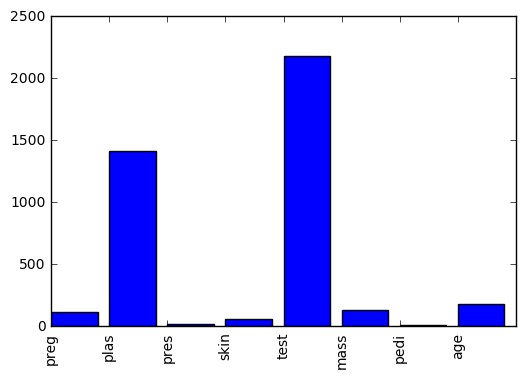

In [10]:
# Let's see the plot

values = -np.log10(fit.pvalues_)

#There is a value equal to infinity. Corresponding to the 2175 above. We assign it some large value to plot
from numpy import inf
values[values==inf]= values[values!=inf].max()*20

scores = fit.scores_

plt.bar(range(len(names[:8])), scores )
plt.xticks(range(len(names[:8])), names[:8], rotation='vertical')
plt.show()


In [11]:
Xnew = fit.transform(dataframe[names[:8]])

#chosen_features = [dataframe.columns[j] for i in range(4) for j in range(len(names))  if dataframe.iloc[:,[j]]==Xnew[i]]
#a=[ dataframe.columns[j] for i in range(4) for j in range(len(names)) if  ]
print Xnew

[[ 148.     0.    33.6   50. ]
 [  85.     0.    26.6   31. ]
 [ 183.     0.    23.3   32. ]
 ..., 
 [ 121.   112.    26.2   30. ]
 [ 126.     0.    30.1   47. ]
 [  93.     0.    30.4   23. ]]


# PCA

In [19]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=3)
fit = pca.fit(X)
Xn = pca.fit_transform(X)

In [24]:
print Xn

[[-75.71465491 -35.95078264  -7.26078895]
 [-82.3582676   28.90821322  -5.49667139]
 [-74.63064344 -67.90649647  19.46180812]
 ..., 
 [ 32.11319827   3.3766648   -1.58786446]
 [-80.21449431 -14.18601977  12.3512639 ]
 [-81.30814972  21.62149606  -8.15276833]]


In [25]:
# The 3 Feature Vectors (eigenvectors)
# These are the one's with the highest variance

print fit.components_

[[ -2.02176587e-03   9.78115765e-02   1.60930503e-02   6.07566861e-02
    9.93110844e-01   1.40108085e-02   5.37167919e-04  -3.56474430e-03]
 [ -2.26488861e-02  -9.72210040e-01  -1.41909330e-01   5.78614699e-02
    9.46266913e-02  -4.69729766e-02  -8.16804621e-04  -1.40168181e-01]
 [ -2.24649003e-02   1.43428710e-01  -9.22467192e-01  -3.07013055e-01
    2.09773019e-02  -1.32444542e-01  -6.39983017e-04  -1.25454310e-01]]


# Recursive Feature Elimination

In [137]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [138]:
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 3 5 6 1 1 4]
